In [1]:
import findspark
findspark.init()

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import pandas.io.sql as psql
import seaborn as sns
import numpy as np
import pyspark
from pyspark.sql import SparkSession
import datetime as dt

In [2]:
spark = SparkSession.builder.master("local[1]").appName('Credit_card.com').getOrCreate()

In [3]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='password',
    database='creditcard_capstone'
)

In [4]:
cursor = connection.cursor()


In [5]:
sql = "SELECT * FROM cdw_sapp_credit_card"
cursor.execute(sql)
result_set = cursor.fetchall()
data_frame = psql.read_sql(sql, con=connection)
pd.set_option("display.max_columns", None)
#print(data_frame.head())

C:\Users\Learner_XZHCG225\AppData\Local\Temp\ipykernel_15048\2104550781.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_frame = psql.read_sql(sql, con=connection)


In [6]:
data_frame

,TRANSACTION_ID,CUST_CC_NO,CUST_SSN,BRANCH_CODE,TRANSACTION_TYPE,TRANSACTION_VALUE,TIMEID
0,17409,4210653369905302,123456698,43,Entertainment,25.49,20181220
1,17410,4210653369905302,123456698,63,Grocery,47.08,20181221
2,17411,4210653369905302,123456698,12,Test,82.87,20181101
3,17412,4210653369905302,123456698,44,Bills,65.46,20180114
4,17413,4210653369905302,123456698,7,Grocery,95.63,20180808
...,...,...,...,...,...,...,...
46689,46690,4210653344660822,123451007,49,Gas,66.20,20180912
46690,46691,4210653344660822,123451007,168,Grocery,100.13,20180205
46691,46692,4210653344660822,123451007,104,Test,35.83,20181216
46692,46693,4210653344660822,123451007,32,Entertainment,90.99,20180115


In [7]:
spark_df = spark.createDataFrame(data_frame)

C:\Spark\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


plot the top three months with the largest transaction data.

0        12
1        12
2        11
3         1
4         8
         ..
46689     9
46690     2
46691    12
46692     1
46693    11
Name: month, Length: 46694, dtype: int64
    month  TRANSACTION_VALUE
0       1          196568.87
1       2          201086.67
2       3          196488.59
3       4          194203.25
4       5          201310.26
5       6          195468.74
6       7          201199.35
7       8          196453.41
8       9          196069.44
9      10          202583.89
10     11          200549.36
11     12          201251.08
    month  TRANSACTION_VALUE
4       5          201310.26
9      10          202583.89
11     12          201251.08


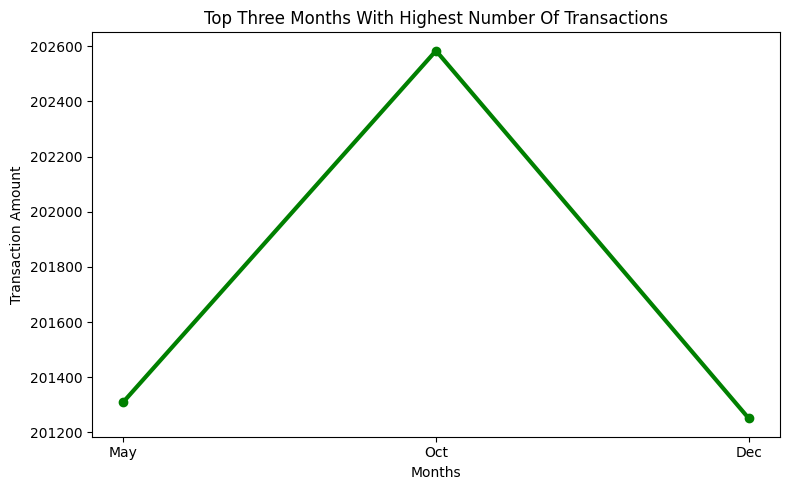

In [8]:
spark_df = spark_df.select('TIMEID', 'TRANSACTION_VALUE')
panda_df = spark_df.toPandas()
panda_df["month"] = pd.to_datetime(panda_df["TIMEID"],format='%Y%m%d').dt.month
print(panda_df['month'])

df_months = panda_df.groupby('month')['TRANSACTION_VALUE'].sum().reset_index()
print(df_months)
df_months = df_months.sort_values(by=['TRANSACTION_VALUE'], ascending=False)
#df_months = df_months.sort_values(by=['month'])
df_months = df_months[:3]
df_months = df_months.sort_values(by=['month'],ascending=True)
print(df_months)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
x = ['May','Oct','Dec']
#y = [196568.87,201086.67,196488.59,194203.25,201310.26,195468.74,201199.35,196453.41,196069.44,202583.89,200549.36,201251.08]
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, df_months['TRANSACTION_VALUE'], ls='-', c='g', lw='3', marker='o')
plt.title('Top Three Months With Highest Number Of Transactions')
plt.xticks(default_x_ticks,x)
plt.ylabel('Transaction Amount')
plt.xlabel('Months')
plt.show()

0        12
1        12
2        11
3         1
4         8
         ..
46689     9
46690     2
46691    12
46692     1
46693    11
Name: month, Length: 46694, dtype: int64
    month  TRANSACTION_VALUE
0       1          196568.87
1       2          201086.67
2       3          196488.59
3       4          194203.25
4       5          201310.26
5       6          195468.74
6       7          201199.35
7       8          196453.41
8       9          196069.44
9      10          202583.89
10     11          200549.36
11     12          201251.08


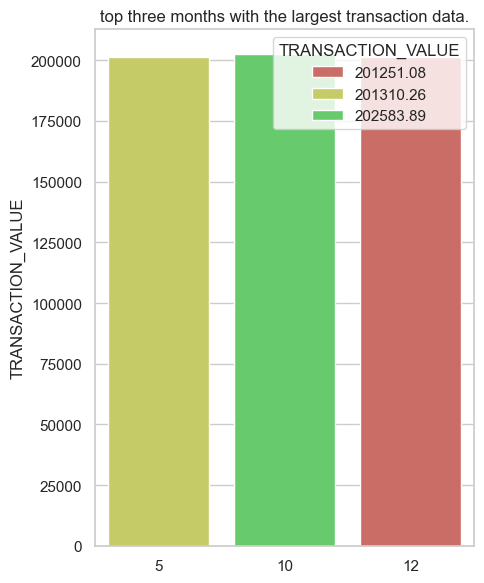

In [9]:
spart_df = spark_df.select('TIMEID', 'TRANSACTION_VALUE')
panda_df = spart_df.toPandas()
panda_df["month"] = pd.to_datetime(panda_df["TIMEID"],format='%Y%m%d').dt.month
print(panda_df['month'])

df_months = panda_df.groupby('month')['TRANSACTION_VALUE'].sum().reset_index()
print(df_months)
df_months = df_months.sort_values(by=['TRANSACTION_VALUE'], ascending=False)

df_months = df_months[:3]
df_months = df_months.sort_values(by=['month'],ascending=True)
df_months
sns.set(rc={"figure.figsize":(5,6)})
sns.set_theme(style="whitegrid", palette="hls")
ax = sns.barplot(x ='month',
            y ='TRANSACTION_VALUE',
            hue='TRANSACTION_VALUE',
            dodge=False,
            data =df_months).set(title ="top three months with the largest transaction data.",xlabel= "")
plt.show()

 plot which branch processed the highest total dollar value of healthcare transactions.

In [11]:
spark_df = spark.createDataFrame(data_frame)

C:\Spark\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [12]:
spark_df = spark_df.select('BRANCH_CODE', 'TRANSACTION_VALUE').filter(spark_df.TRANSACTION_TYPE == 'Healthcare')
panda_df = spark_df.toPandas()
df = panda_df.groupby('BRANCH_CODE')['TRANSACTION_VALUE'].sum().reset_index()
df = df.sort_values(by=['TRANSACTION_VALUE'], ascending=False)
df = df[:5]
df_top5 = df.sort_values(by=['BRANCH_CODE'],ascending=True)
print(df)

    BRANCH_CODE  TRANSACTION_VALUE
22           25            4370.18
53           60            4072.04
69           83            4003.37
31           36            3823.87
83          111            3720.27


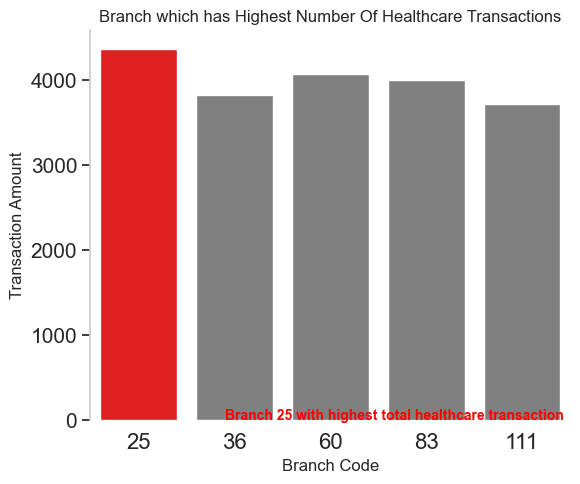

In [13]:
top_five = df_top5['TRANSACTION_VALUE']
colors = ['grey' if (s < max(top_five)) else 'red' for s in top_five]

fig, ax = plt.subplots(figsize=(6,5))
sns.set_style('white')
ax=sns.barplot(x='BRANCH_CODE', y='TRANSACTION_VALUE',
               data=df_top5, palette=colors)
plt.title('Branch which has Highest Number Of Healthcare Transactions', fontsize=12)
plt.xlabel('Branch Code')
plt.xticks(fontsize=16)
plt.ylabel('Transaction Amount', fontsize=12)
plt.yticks(fontsize=15)
ax.text(x=0.9, y=0.9, s='Branch 25 with highest total healthcare transaction',
        color='red', size=10, weight='bold')
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.show()

Find and plot which transaction type has a high rate of transactions.

In [15]:
spark_df = spark.createDataFrame(data_frame)

C:\Spark\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


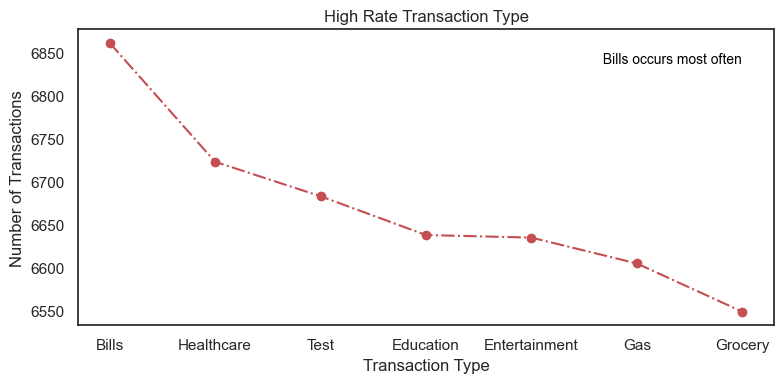

In [16]:
spark_df = spark_df.select('TRANSACTION_TYPE')
pandas_df = spark_df.toPandas()
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
plt.plot(pandas_df['TRANSACTION_TYPE'].value_counts(), ls='-.', c='r', marker='o')
plt.title('High Rate Transaction Type')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')
plt.text(6, 6850, ' Bills occurs most often', fontsize = 10,
      color ='black', ha ='right', va ='top',
         alpha = 1.0)
#plt.text(4, 6850, 'Bills occurs most often')  # see note below
plt.show()

Customer_plots

In [17]:
sql = "SELECT * FROM cdw_sapp_customer"
cursor.execute(sql)
result_set = cursor.fetchall()
data_frame = psql.read_sql(sql, con=connection)
pd.set_option("display.max_columns", None)
#print(data_frame.head())

C:\Users\Learner_XZHCG225\AppData\Local\Temp\ipykernel_15048\1166130546.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_frame = psql.read_sql(sql, con=connection)


In [18]:
data_frame

,CREDIT_CARD_NO,CUST_CITY,CUST_COUNTRY,CUST_EMAIL,CUST_PHONE,CUST_STATE,CUST_ZIP,FIRST_NAME,LAST_NAME,LAST_UPDATED,MIDDLE_NAME,SSN,FULL_STREET_ADDRESS
0,4210653310061055,Natchez,United States,AHooper@example.com,(123) 781-8,MS,39120,Alec,Hooper,2018-04-21 12:49:02,wm,123456100,"656,Main Street North"
1,4210653310102868,Wethersfield,United States,EHolman@example.com,(123) 893-3,CT,6109,Etta,Holman,2018-04-21 12:49:02,brendan,123453023,"829,Redwood Drive"
2,4210653310116272,Huntley,United States,WDunham@example.com,(124) 301-8,IL,60142,Wilber,Dunham,2018-04-21 12:49:02,ezequiel,123454487,"683,12th Street East"
3,4210653310195948,NewBerlin,United States,EHardy@example.com,(124) 321-5,WI,53151,Eugenio,Hardy,2018-04-21 12:49:02,trina,123459758,"253,Country Club Road"
4,4210653310356919,ElPaso,United States,WAyers@example.com,(124) 207-4,TX,79930,Wilfred,Ayers,2018-04-21 12:49:02,may,123454431,"301,Madison Street"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,4210653399559239,SiouxCity,United States,FCastle@example.com,(123) 834-4,IA,51106,Freida,Castle,2018-04-21 12:49:02,jonah,123451589,"882,Main Street South"
948,4210653399650358,Summerville,United States,FBlock@example.com,(124) 042-0,SC,29483,Fern,Block,2018-04-21 12:49:02,aron,123457088,"470,Glenwood Avenue"
949,4210653399732638,Duluth,United States,DPruitt@example.com,(123) 614-9,GA,30096,Dylan,Pruitt,2018-04-21 12:49:02,lucas,123453259,"405,Country Lane"
950,4210653399859149,Rowlett,United States,EBeatty@example.com,(123) 688-6,TX,75088,Emery,Beatty,2018-04-21 12:49:02,susanna,123454047,"15,8th Street"


In [19]:
spark_df = spark.createDataFrame(data_frame)

C:\Spark\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


Find and plot which state has a high number of customers.

C:\Users\Learner_XZHCG225\AppData\Local\Temp\ipykernel_15048\717793776.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color = 'grey',linestyle = '-.',linewidth=0.5,alpha=0.9)


Text(0.9, 0.15, 'NEWYORK STATE WITH HIGHEST NUMBER OF CUSTOMERS')

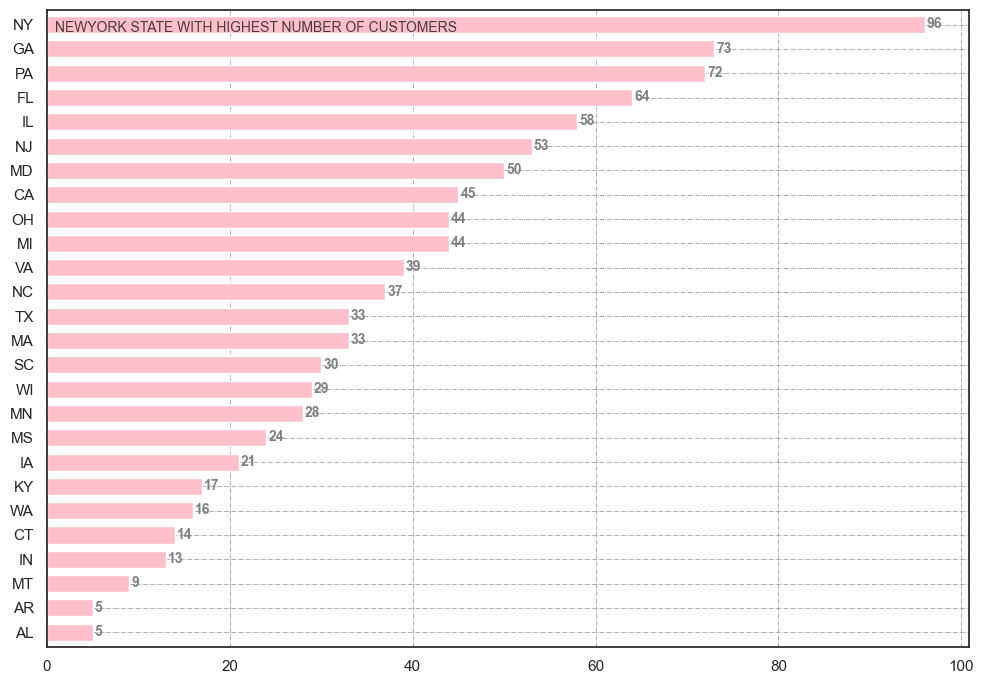

In [20]:
spark_df= spark_df.select("CUST_STATE")
pandas_df = spark_df.toPandas()
pandas_df = pandas_df['CUST_STATE'].value_counts()
ax=pandas_df.plot(kind="barh",rot=0, figsize=(10,7),width=0.7,
               color='pink')
ax.grid(b = True, color = 'grey',linestyle = '-.',linewidth=0.5,alpha=0.9)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold',
             color = 'grey')
plt.text(0.9,0.15,'NEWYORK STATE WITH HIGHEST NUMBER OF CUSTOMERS', fontsize=10,color = 'black', ha = 'left',va='center',alpha = 0.7)

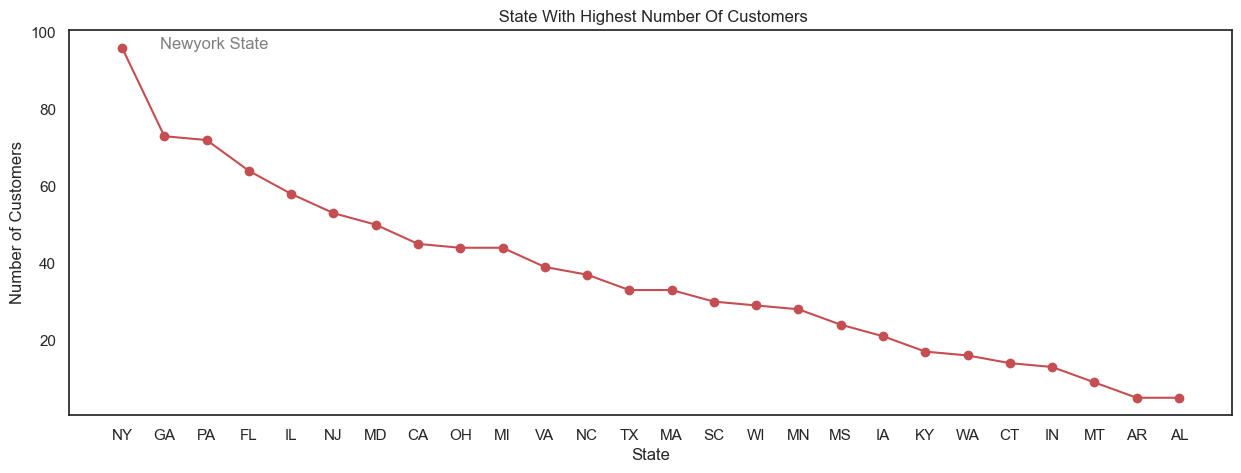

In [21]:
spark_df = spark_df.select('CUST_STATE')
pandas_df = spark_df.toPandas()
#pandas_df = pandas_df.sort_values(by='CUST_STATE',ascending=False)
#plt.bar(pandas_df['CUST_STATE'].value_counts())

plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = False
plt.plot(pandas_df['CUST_STATE'].value_counts(), ls='-', c='r', marker='o')
plt.title(' State With Highest Number Of Customers')
plt.ylabel('Number of Customers')

plt.xlabel('State')

plt.text(0.9, 95, 'Newyork State', fontsize = 12,
      color ='grey', ha ='left', va ='bottom',
         alpha = 1.0)
plt.show()

Find and plot the sum of all transactions for the top 10 customers, and which customer has the highest transaction amount.
hint(use CUST_SSN).

In [22]:
sql = "SELECT c.FIRST_NAME,c.LAST_NAME,c.MIDDLE_NAME,c.SSN,c.CUST_EMAIL,cc.CUST_SSN,cc.TRANSACTION_VALUE FROM cdw_sapp_customer c  JOIN cdw_sapp_credit_card cc ON c.SSN=cc.CUST_SSN "
cursor.execute(sql)
result_set = cursor.fetchall()
data_frame = psql.read_sql(sql, con=connection)
pd.set_option("display.max_columns", None)
#print(data_frame.head())

C:\Users\Learner_XZHCG225\AppData\Local\Temp\ipykernel_15048\876133078.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_frame = psql.read_sql(sql, con=connection)


In [23]:
spark_df = spark.createDataFrame(data_frame)

C:\Spark\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [24]:
spark_df= spark_df.select('SSN', 'FIRST_NAME', 'LAST_NAME', 'TRANSACTION_VALUE')
pandas_df = spark_df.toPandas()
#print(pandas_df)
pandas_df = pandas_df.groupby('FIRST_NAME')['TRANSACTION_VALUE'].sum().reset_index()
print(pandas_df)
pandas_df = pandas_df.sort_values(by=['TRANSACTION_VALUE'], ascending=False)
print(pandas_df)

pandas_df = pandas_df[:10]

    FIRST_NAME  TRANSACTION_VALUE
0         Abby            3271.94
1        Abdul            2748.71
2         Abel            1693.32
3         Adam            2129.52
4        Addie            8026.11
..         ...                ...
766      Young             563.80
767  Zachariah            2404.70
768    Zachery            3521.88
769    Zackary            3934.62
770      Zelma            3571.18

[771 rows x 2 columns]
    FIRST_NAME  TRANSACTION_VALUE
16      Alexis           15134.35
158   Courtney           11994.20
33      Amalia           11258.00
61     Aurelia            9462.95
733        Van            9414.12
..         ...                ...
57    Ashleigh              78.52
544      Nancy              73.08
132   Chadwick              61.67
250     Ernest              10.41
478      Lydia               2.15

[771 rows x 2 columns]


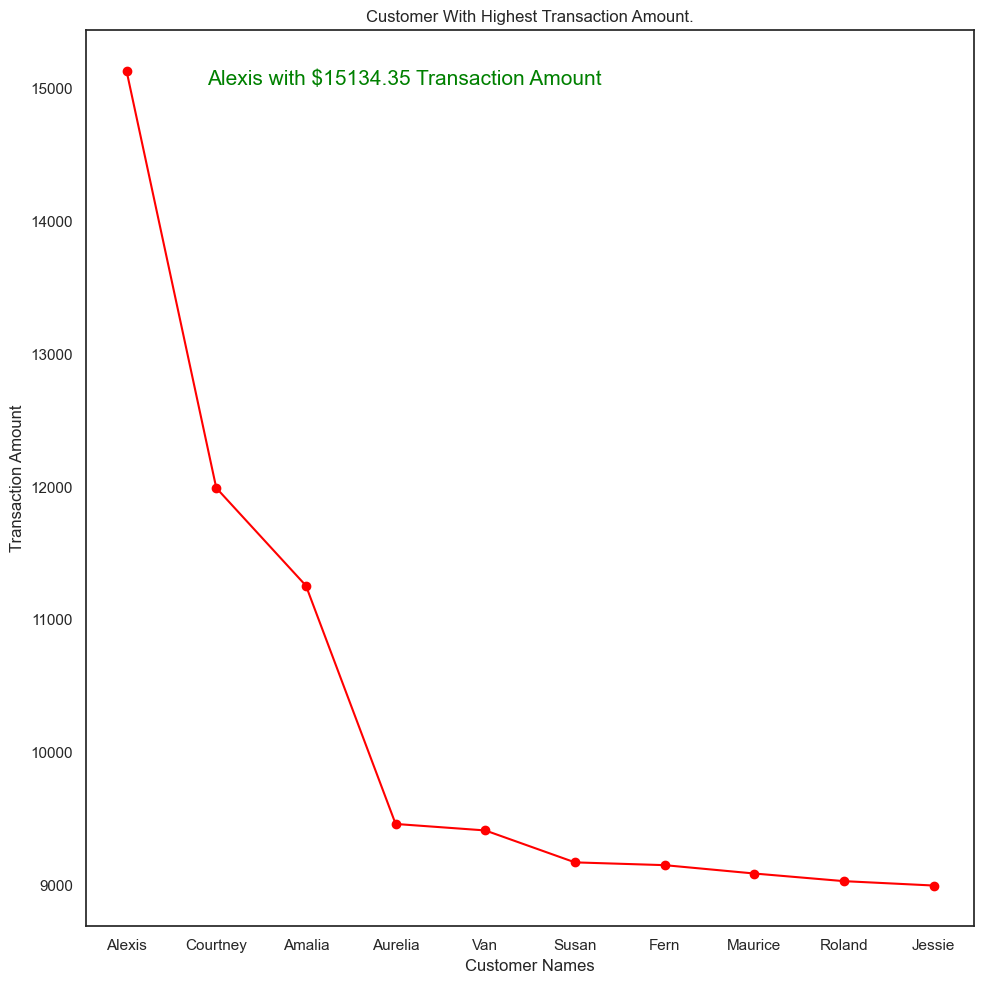

In [27]:
plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True
plt.plot(pandas_df['FIRST_NAME'], pandas_df['TRANSACTION_VALUE'], ls='-', c='red', marker='o')
plt.xticks(pandas_df['FIRST_NAME'])
plt.title('Customer With Highest Transaction Amount.')
plt.text(0.9,15000, 'Alexis with $15134.35 Transaction Amount', fontsize = 15,
      color ='green', ha ='left', va ='bottom',
         alpha = 1.0)
plt.ylabel('Transaction Amount')
plt.xlabel('Customer Names')

plt.show()